# Challenge 2

- Plot Fourier trasform of a simple function (sin or cos)  
- Plot a hybrid function(sin + cos)  
- Use a wave from audio file, apply fourier transform  

In [26]:
import librosa
import librosa.display
import speech_recognition as sr

from IPython.display import Audio
from matplotlib import pyplot as plt

import numpy as np

from scipy.io import wavfile as wav
from scipy.fftpack import fft

In [40]:
def ff_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)
    plt.figure(figsize=(12,6))
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel('Frequency')
    plt.xlabel('Magnitude')
    return plt.show()

## Fourier transform of Sine function

Sine wave function:  

$$y(t) = A\sin(2\pi f t)$$

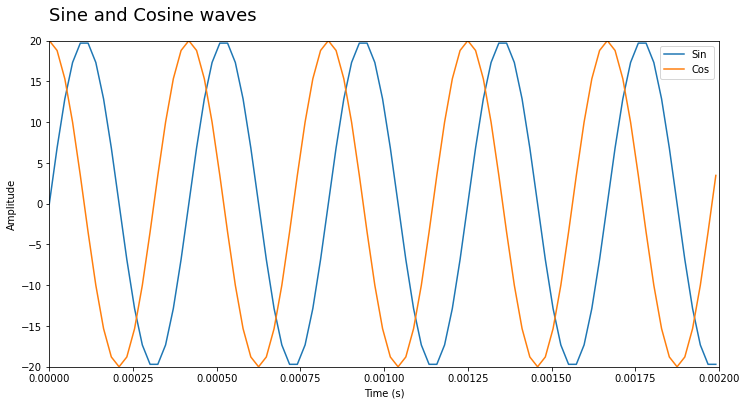

In [2]:
# Defining wave specs
fs  = 43200                        # 43.2kHz sample 
A   = 20                           # Amplitude
t_i = 0.002                        # signal time (seconds)
f0  = 2400                         # 2.4kHz audible spectrum frequency
t   = np.arange(0, t_i, 1.0 / fs)  # uniform quantization

# Wave function
sin_wave = A * np.sin(2 * np.pi * f0 * t )
cos_wave = A * np.cos(2 * np.pi * f0 * t )

# np.cos()
# pi = 3.14

# Plot wave
plt.figure(figsize=(12,6))
plt.plot(t, sin_wave, label='Sin')
plt.plot(t, cos_wave, label='Cos')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.axis([0, t_i, -A, A])
plt.title('Sine and Cosine waves', loc='left', pad=20, size=18)
plt.legend()
plt.show()

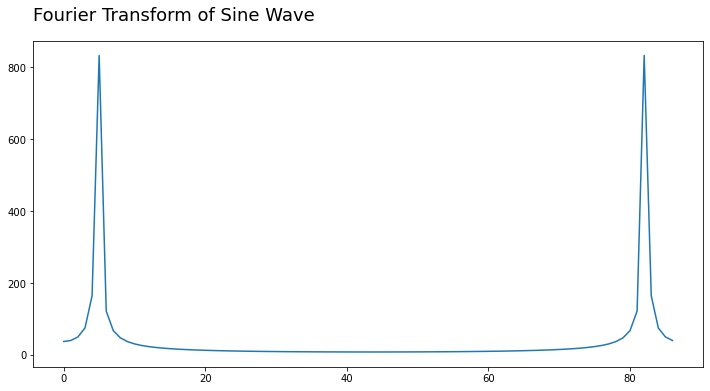

In [3]:
def compute_ft(array, n):
    # Discrete Fourier Transform sample frequencies
    freq = np.fft.fftfreq(n)
    # Compute the one-dimensional discrete Fourier Transform
    fft_cal = np.fft.fft(array)
    return fft_cal

# Apply Fourier Transform
sin_wave_ft = compute_ft(sin_wave, fs)

# Plot Fourier Transform of Sine wave
plt.figure(figsize=(12,6))
plt.plot(abs(sin_wave_ft))
plt.title('Fourier Transform of Sine Wave', loc='left', pad=20, size=18)
plt.show()

## FT of Hybrid Function

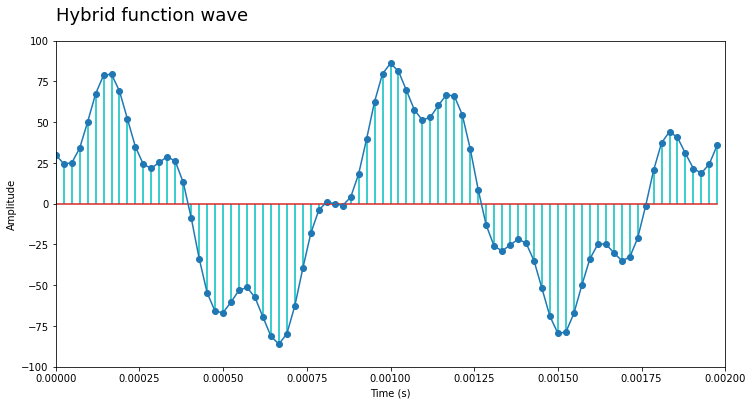

In [19]:
n = len(audio)
    T = 1/sampling_rate
    yf = fft(audio)
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2)


def create_wave(fs=44000, A=20, t_i=0.001, f0=1200, func=np.sin):                       
    t = np.arange(0, t_i, 1.0 / fs)
    return A * func(2 * np.pi * f0 * t ), t


sampling_rate = 42000
max_A = 100
t_i = 0.002

wave_1, t = create_wave(fs=sampling_rate, A=15, f0=1200, t_i=t_i)
wave_2, _ = create_wave(fs=sampling_rate, A=30, f0=900,  t_i=t_i, func=np.cos)
wave_3, _ = create_wave(fs=sampling_rate, A=20, f0=4800, t_i=t_i)

final_wave = wave_1 + wave_2 + (2*wave_1 - wave_3)

# Plot wave
plt.figure(figsize=(12,6))
plt.stem(t, final_wave, 'c')
plt.plot(t, final_wave)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.axis([0, t_i, -max_A, max_A])
plt.title('Hybrid function wave', loc='left', pad=20, size=18)
plt.show()

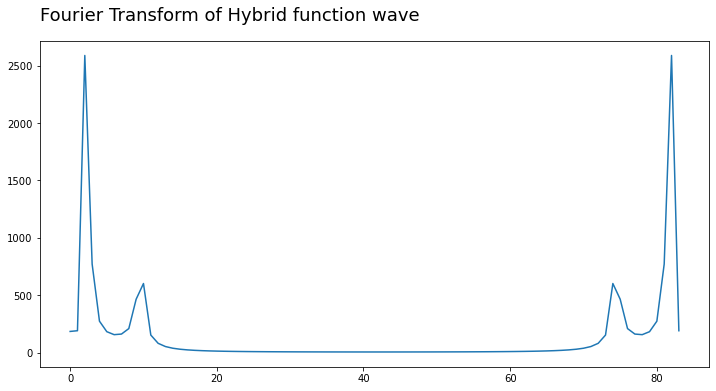

In [5]:
# Apply Fourier Transform
final_wave_ft = compute_ft(final_wave, fs)

# Plot Fourier Transform of Hybrid function
plt.figure(figsize=(12,6))
plt.plot(abs(final_wave_ft))
plt.title('Fourier Transform of Hybrid function wave', loc='left', pad=20, size=18)
plt.show()

## FT of Audio File

In [6]:
# Load audio file
y , sr = librosa.load('giorgio.wav')
# Audio test
Audio(y , rate=sr)

In [24]:
sr.

<module 'speech_recognition' from '/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/speech_recognition/__init__.py'>

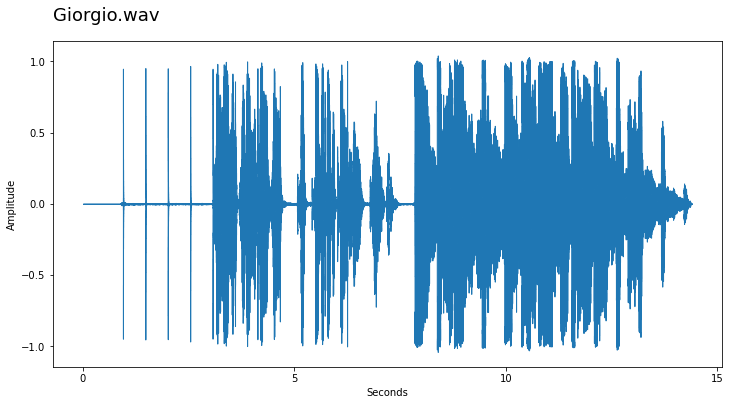

In [7]:
# Plot audio wave
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Seconds')
plt.ylabel('Amplitude')
plt.title('Giorgio.wav', loc='left', pad=20, size=18)
plt.show()

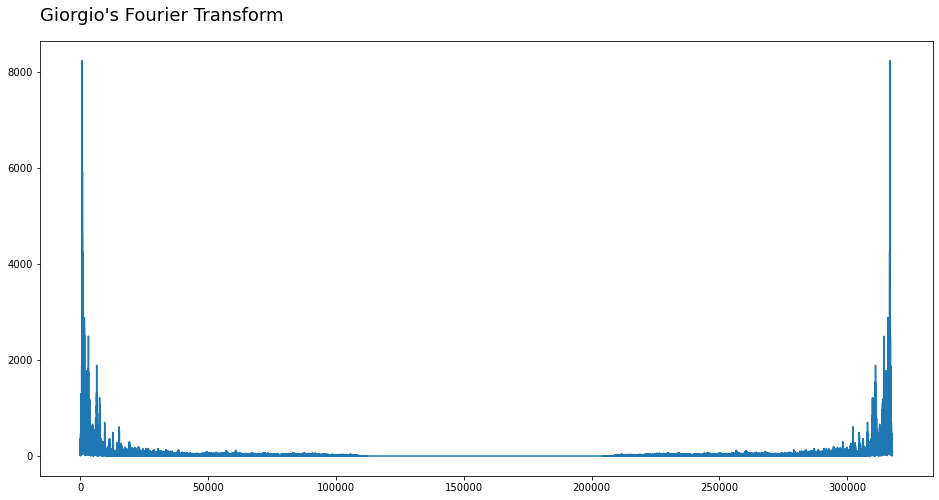

In [15]:
# Apply Fourier Transform
y_ft = compute_ft(y, fs)

# Plot Fourier Transform of Giorgio
plt.figure(figsize=(16,8))
plt.plot(abs(y_ft))
plt.title('Giorgio\'s Fourier Transform', loc='left', pad=20, size=18)
plt.show()

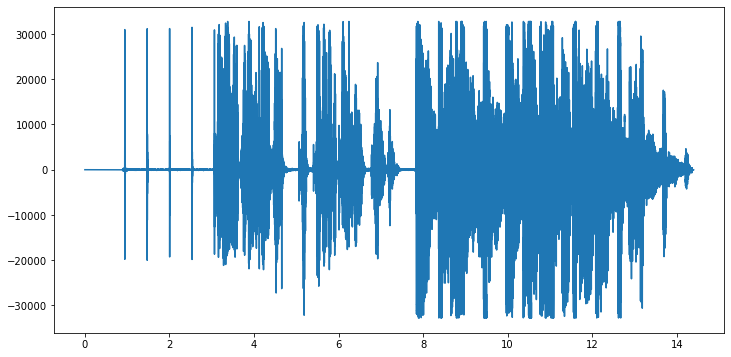

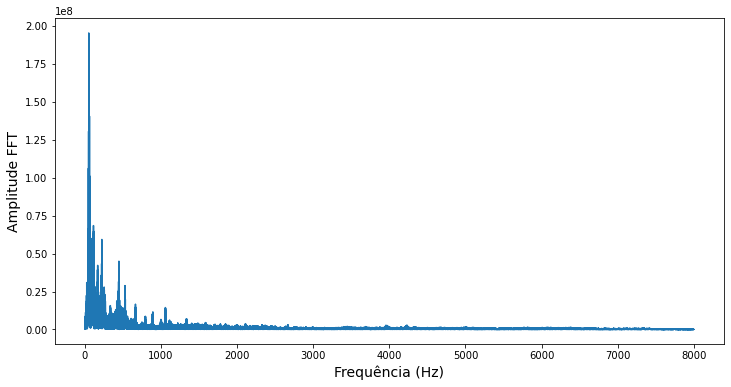

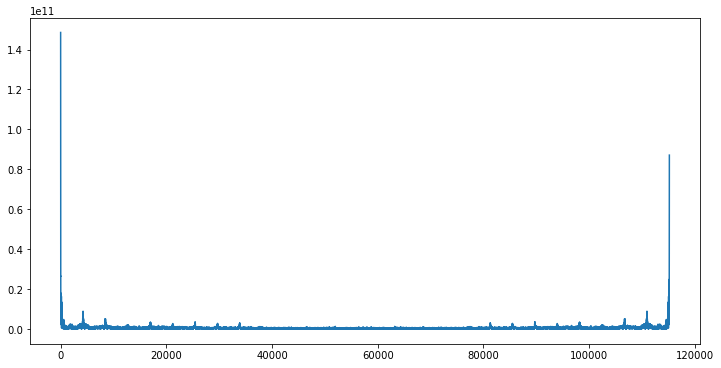

In [29]:
Fs, data = wav.read('giorgio.wav')                       
Audio_m = data[:]   

L = len(Audio_m)           # Longitude do sinal 

n = np.arange(0,L)/Fs      # Vetor do tempo na mesma longitude do sinal 

plt.figure(figsize=(12,6))
plt.plot(n,Audio_m)
plt.show()

gk = fft(Audio_m)                       
M_gk = abs(gk)                                   
M_gk = M_gk[0:L//2]                              

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.figure(figsize=(12,6))
plt.plot(F, M_gk)
plt.xlabel('Frequência (Hz)', fontsize='14')
plt.ylabel('Amplitude FFT', fontsize='14')
plt.show()

freq = np.fft.fftfreq(fs)
fft_cal = np.fft.fft(M_gk )

plt.figure(figsize=(12,6))
plt.plot(np.abs(fft_cal))
plt.show()

## Test

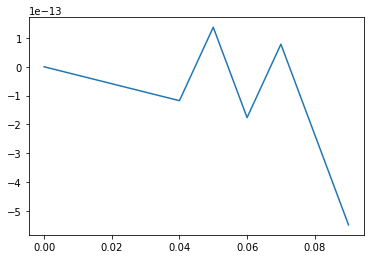

In [68]:
_sr = 100
_A  = 10
_ti = 0.1
_f0 = 1200
_t = np.arange(0, _ti, 1/_sr)
_wave =  _A * np.sin(2 * np.pi * _f0 * _t)

plt.plot(_t, _wave)

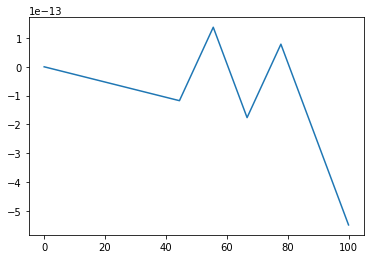

In [67]:
_n = len(_wave)    # 10
_T = 1/_sr         # 0.01
_xf = np.linspace(0, 1/_T, _n)
_yf = fft(_wave)

plt.plot(_xf, _wave)

In [ ]:
np.linspace(0, 1/(2.0*T), n//2)

/Users/baiochi/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


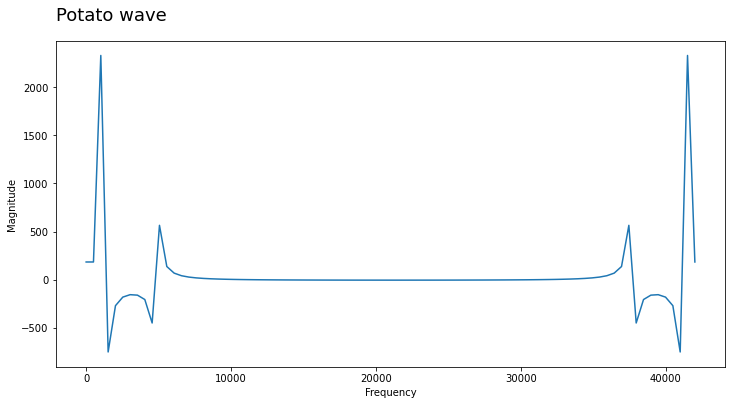

In [70]:
def create_wave(fs=44000, A=20, t_i=0.001, f0=1200, func=np.sin):                       
    t = np.arange(0, t_i, 1.0 / fs)
    return A * func(2 * np.pi * f0 * t )

def plot_fft(wave, sr, mirror=True):
    n = len(wave)
    y_fft = fft(wave)
    if mirror:
        frequency = np.linspace(0.0, sr, n)
    else:
        frequency = np.linspace(0.0, 2.0*sr, n//2)
        y_fft = 2.0/n * np.abs(y_fft[:n//2])
    
    # Plot wave
    plt.figure(figsize=(12,6))
    plt.plot(x_values, y_fft)
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    #plt.axis([0, t_i, -max_A, max_A])
    plt.title('Potato wave', loc='left', pad=20, size=18)
    plt.show()



#max_A = 100
sampling_rate = 42000
t_i = 0.002

wave_1 = create_wave(fs=sampling_rate, A=15, f0=1200, t_i=t_i)
wave_2 = create_wave(fs=sampling_rate, A=30, f0=900,  t_i=t_i, func=np.cos)
wave_3 = create_wave(fs=sampling_rate, A=20, f0=4800, t_i=t_i)

final_wave = wave_1 + wave_2 + (2*wave_1 - wave_3)

plot_fft(final_wave, sampling_rate)